In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/jasmineli/Desktop/PytorchOCR/tools')
from rec_infer import *

In [3]:
'''
Evaluate the effect of blurriness score on the original evalutation set
'''
data_info = '/Users/jasmineli/Desktop/PytorchOCR/ccpd-data/val.txt'
model_path = '/Users/jasmineli/Desktop/PytorchOCR/output/CRNN/checkpoint/best.pth'

print(f'Starting...')
print(f'parsing image paths and annotations')
data = get_images_and_label(data_info)
print(f'loading model...')
model = RecInfer(model_path)
print(f'loading images...')
data['images'] = [cv2.imread(img) for img in data['image_paths']]
labels = data['labels']

output_dir = None
out = model.predict(data['images'])
stats = get_stats(out, data, output_dir=output_dir)
accuracy = stats['accuracy']
print(f'\ntotal # of images to predict: {len(labels)}; accuracy: {accuracy}')



Starting...
parsing image paths and annotations
reading img path and labels...
loading model...
loading images...
starting prediction...
predicting 0th img out of 46957
predicting 2000th img out of 46957
predicting 4000th img out of 46957
predicting 6000th img out of 46957
predicting 8000th img out of 46957
predicting 10000th img out of 46957
predicting 12000th img out of 46957
predicting 14000th img out of 46957
predicting 16000th img out of 46957
predicting 18000th img out of 46957
predicting 20000th img out of 46957
predicting 22000th img out of 46957
predicting 24000th img out of 46957
predicting 26000th img out of 46957
predicting 28000th img out of 46957
predicting 30000th img out of 46957
predicting 32000th img out of 46957
predicting 34000th img out of 46957
predicting 36000th img out of 46957
predicting 38000th img out of 46957
predicting 40000th img out of 46957
predicting 42000th img out of 46957
predicting 44000th img out of 46957
predicting 46000th img out of 46957
complet

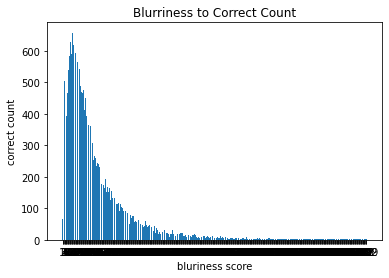

In [4]:
hit_x = []
hit_y = []
lst = list(stats['blur2hit'].keys())
lst.sort()
lst = [str(l) for l in lst]
for b in lst:
    hit_x.append(b)
    hit_y.append(stats['blur2hit'][int(b)])

plt.bar(hit_x, hit_y)
plt.xlabel('bluriness score')
plt.ylabel('correct count')
plt.title('Blurriness to Correct Count')
plt.show()

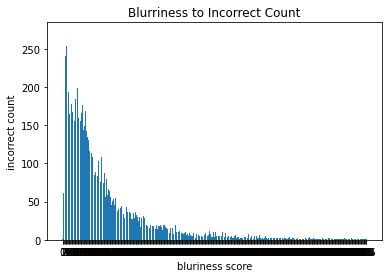

In [5]:
miss_x = []
miss_y = []
lst = list(stats['blur2miss'].keys())
lst.sort()
lst = [str(l) for l in lst]
for b in lst:
    miss_x.append(b)
    miss_y.append(stats['blur2miss'][int(b)])

plt.bar(miss_x, miss_y)
plt.xlabel('bluriness score')
plt.ylabel('incorrect count')
plt.title('Blurriness to Incorrect Count')
plt.show()

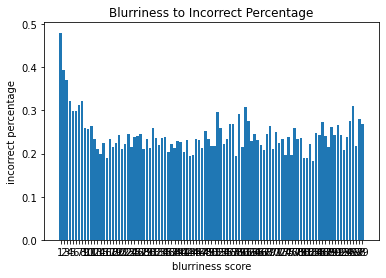

In [6]:
miss_pct = {}
for i in range(1, 100):
    miss_cnt = stats['blur2miss'][i] if i in stats['blur2miss'] else 0
    hit_cnt = stats['blur2hit'][i] if i in stats['blur2hit'] else 0
    miss_pct[i] = 1.0 * miss_cnt / (miss_cnt + hit_cnt)

lst = list(miss_pct.keys())
lst.sort()
lst = [str(l) for l in lst]

pct_x = []
pct_y = []
for b in lst:
    pct_x.append(b)
    pct_y.append(miss_pct[int(b)])

plt.bar(pct_x, pct_y)
plt.ylabel('incorrect percentage')
plt.xlabel('blurriness score')
plt.title('Blurriness to Incorrect Percentage')
plt.show()

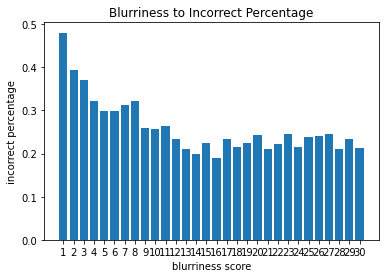

In [7]:
plt.bar(pct_x[:30], pct_y[:30])
plt.ylabel('incorrect percentage')
plt.xlabel('blurriness score')
plt.title('Blurriness to Incorrect Percentage')
plt.show()

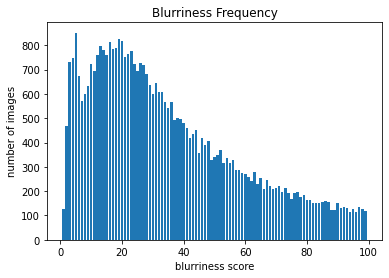

In [10]:
score_x = []
count_y = []

for i in range(1, 100):
    miss_cnt = stats['blur2miss'][i] if i in stats['blur2miss'] else 0
    hit_cnt = stats['blur2hit'][i] if i in stats['blur2hit'] else 0
    count_y.append(miss_cnt + hit_cnt)
    score_x.append(i)

plt.bar(score_x, count_y)
plt.ylabel('number of images')
plt.xlabel('blurriness score')
plt.title('Blurriness Frequency')
plt.show()



In [2]:
def get_laplacian_score(data):
    images = data['images']
    laplacian = []
    for img in images:
        fm = cv2.Laplacian(img, cv2.CV_64F).var()
        laplacian.append(fm)
    data['laplacian'] = laplacian


In [4]:
# Evaluate blurriness with cv2 Laplace transform
'''
Evaluate the effect of cv2 blurriness score on the original evalutation set
'''
data_info = '/Users/jasmineli/Desktop/PytorchOCR/ccpd-data/val.txt'
model_path = '/Users/jasmineli/Desktop/PytorchOCR/output/CRNN/checkpoint/best.pth'

print(f'Starting...')
print(f'parsing image paths and annotations')
data = get_images_and_label(data_info)
print(f'loading model...')
model = RecInfer(model_path)
print(f'loading images...')
data['images'] = [cv2.imread(img) for img in data['image_paths']]
get_laplacian_score(data) # get the laplacian score for each image

# output_dir = None
# data['pred'] = model.predict(data['images'])
# out = data['pred']
# stats = get_stats(out, data, output_dir=output_dir)
# accuracy = stats['accuracy']
# print(f'\ntotal # of images to predict: {len(labels)}; accuracy: {accuracy}')

Starting...
parsing image paths and annotations
reading img path and labels...
loading model...
loading images...


In [6]:
print(data['laplacian'][:10])

[75.58535556037268, 29.803752354860976, 463.39971461930406, 555.1818530002969, 954.7730139690035, 92.7290754239759, 563.4553228086957, 1084.5393673763926, 1394.8137902518226, 75.58565250160359]


<ipython-input-15-7f0bc98bff32>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


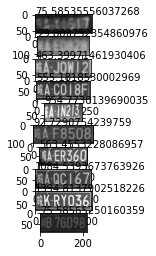

In [15]:
f, axarr = plt.subplots(10) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(10):
    axarr[i].imshow(data['images'][i])
    axarr[i].text(0, 0, str(data['laplacian'][i]))
f.show()